	balance
Retirement accounts	$1,100,000
Brokerage	$1,400,000
Savings	$50,000
Expenses	$100,000
age	46
Retirement age	55

rate of return
0.05
0.06
0.04

In [177]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

import matplotlib as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [188]:
retirement = 1100000
brokerage = 1400000
savings = 50000
expenses = 130000
assets = retirement + brokerage + savings
age = 46
retirement_age = 54
years_to_go = retirement_age - age
years_to_die = 90 - age

retirement_ror = .05
brokerage_ror = .06
savings_ror = .04
inflation = .03

In [189]:
df = pd.DataFrame(columns=['retirement', 'brokerage', 'savings',
                      'age', 'retirement_age', 'expenses', 'retirement_ror',
                    'savings_ror', 'brokerage_ror', 'inflation','assets'])

In [190]:
df.loc[0] = [retirement, brokerage, savings, age, retirement_age, expenses, retirement_ror,
             savings_ror, brokerage_ror, inflation, assets]



In [191]:
for i in range(years_to_die):

    new_retirement = df.loc[i]['retirement']*(1+df.loc[i]['retirement_ror'])
    new_brokerage = df.loc[i]['brokerage']*(1+df.loc[i]['brokerage_ror'])
    new_savings = df.loc[i]['savings']*(1+df.loc[i]['savings_ror'])
    new_expenses = df.loc[i]['expenses']*(1+df.loc[i]['inflation'])
    new_age = df.loc[i]['age']+1

    if new_age == 66:
        new_expenses = new_expenses - 46524

#    if new_age == 62:
#        new_expenses = new_expenses - 32064

    if new_age > retirement_age and new_age < 66:
        new_brokerage = new_brokerage - new_expenses

    if new_age > retirement_age and new_age >= 66 and new_retirement>expenses:
        new_retirement = new_retirement - new_expenses

    if new_retirement<expenses:
        new_brokerage = new_brokerage - new_expenses

    new_assets = new_retirement + new_brokerage + new_savings
    #print("{:.0f}".format(new_age), '${:,.1f}k'.format(new_retirement/1000), '${:,.1f}k'.format(new_brokerage/1000))
    #print('${:,.1f}k'.format(new_retirement/1000))

    df.loc[i+1] = [new_retirement, new_brokerage, new_savings, new_age, retirement_age, new_expenses, retirement_ror,
             savings_ror, brokerage_ror, inflation, new_assets]

In [192]:
#df['retirement']=df['retirement'].apply(lambda x: "${:.1f}k".format((x/1000)))
#df['savings']=df['savings'].apply(lambda x: "${:.1f}k".format((x/1000)))
#df['brokerage']=df['brokerage'].apply(lambda x: "${:.1f}k".format((x/1000)))
#df['expenses']=df['expenses'].apply(lambda x: "${:.1f}k".format((x/1000)))
#df['retirement_ror']=df['retirement_ror'].apply(lambda x: "{:.2%}".format((x)))
#df['savings_ror']=df['savings_ror'].apply(lambda x: "{:.2%}".format((x)))
#df['brokerage_ror']=df['brokerage_ror'].apply(lambda x: "{:.2%}".format((x)))
#df['inflation']=df['inflation'].apply(lambda x: "{:.2%}".format((x)))


Text(0, 0.5, 'Millions of dollars')

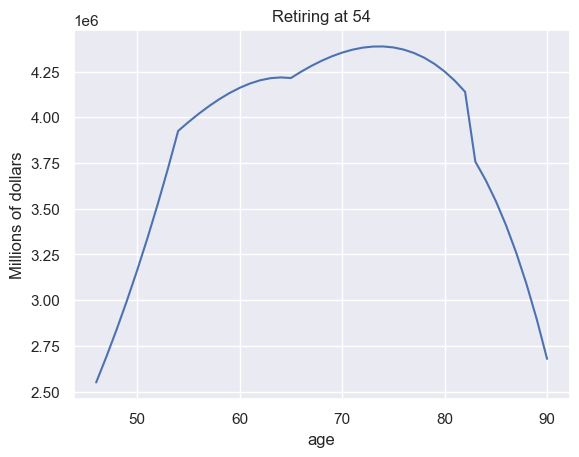

In [193]:
ax = sns.lineplot(data=df, x="age", y="assets")
ax.set_title('Retiring at 54')
ax.set_ylabel('Millions of dollars')

Text(0, 0.5, 'Millions of dollars')

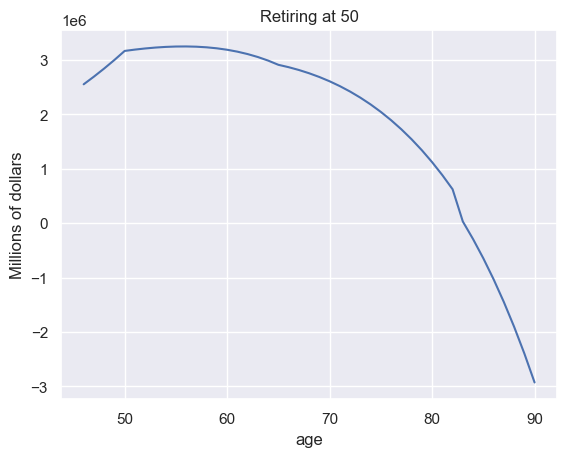

In [187]:
ax = sns.lineplot(data=df, x="age", y="assets")
ax.set_title('Retiring at 50')
ax.set_ylabel('Millions of dollars')